# ML Answers

- **Answer Set**: No. 04
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [407]:
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

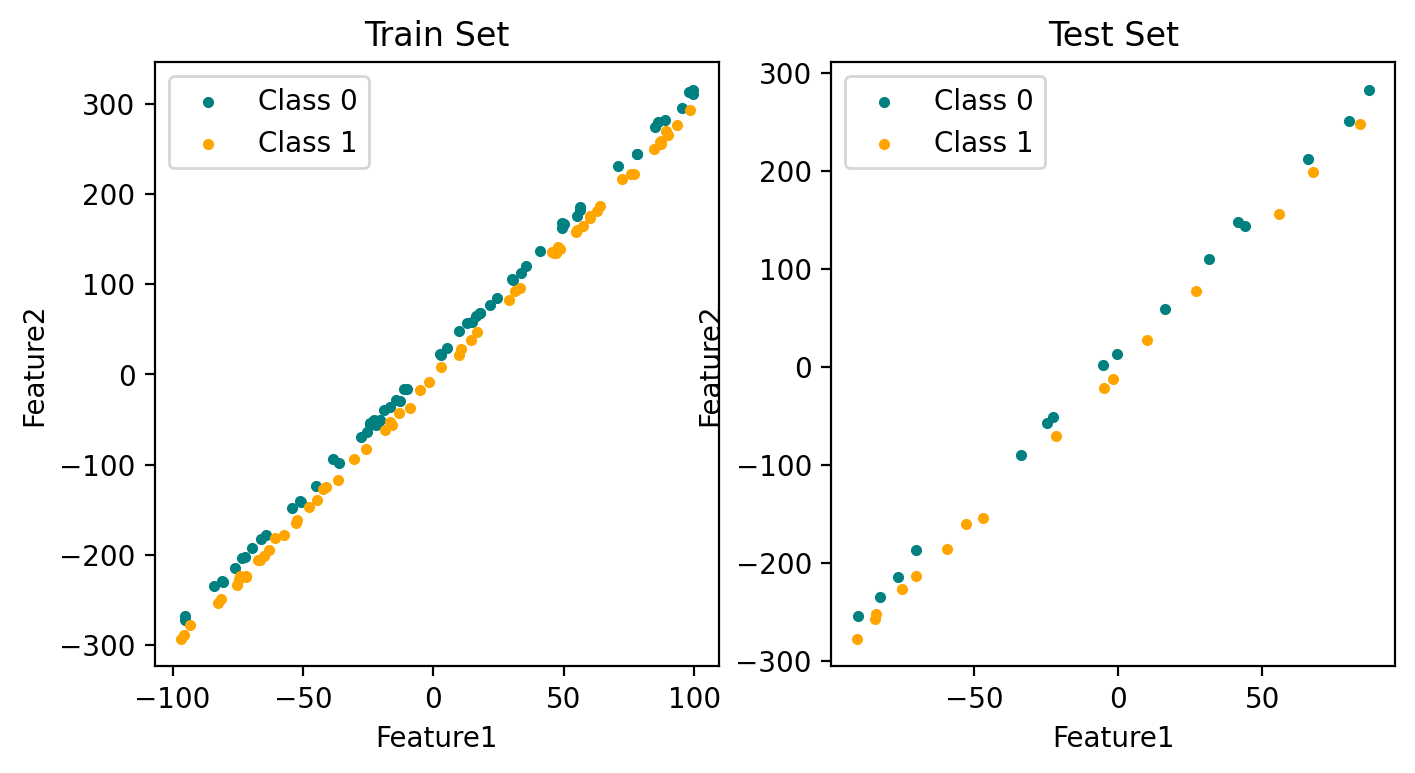

In [408]:
with open("../lib/train_set.npy", "rb") as file:
    train_features = np.load(file)
    train_labels = np.load(file)
    train_labels[train_labels == 0] = -1
    train_class_0 = np.array([
        train_features[i] for i in range(len(train_labels)) if train_labels[i] == -1
    ]).T
    train_class_1 = np.array([
        train_features[i] for i in range(len(train_labels)) if train_labels[i] == 1
    ]).T

with open("../lib/test_set.npy", "rb") as file:
    test_features = np.load(file)
    test_labels = np.load(file)
    test_labels[test_labels == 0] = -1
    test_class_0 = np.array([
        test_features[i] for i in range(len(test_labels)) if test_labels[i] == -1
    ]).T
    test_class_1 = np.array([
        test_features[i] for i in range(len(test_labels)) if test_labels[i] == 1
    ]).T

fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(train_class_0[0], train_class_0[1], label="Class 0", marker=".", c="teal")
ax1.scatter(train_class_1[0], train_class_1[1], label="Class 1", marker=".", c="orange")
ax1.set_title("Train Set")
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
ax2.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.legend()

plt.show()

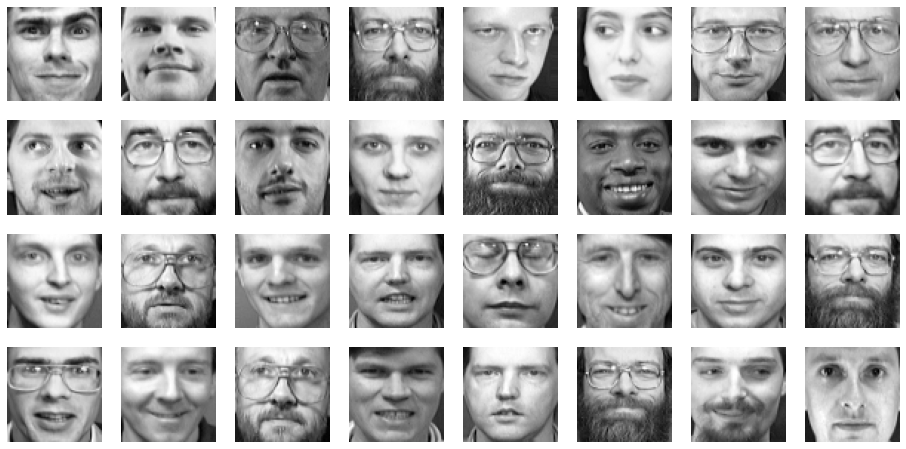

In [409]:
faces_set = sp.loadmat("../lib/faces.mat")["faces"].T

np.random.shuffle(faces_set)

train_faces = faces_set[0:280, :]
test_faces = faces_set[280:-1, :]

faces_images = train_faces.reshape(280, 64, 64)

fig = plt.figure(figsize=(16, 8))

for i in range(8):
    for j in range(4):
        ax = fig.add_subplot(4, 8, (i * 4) + j + 1)
        ax.imshow(faces_images[i * 8 + j].T, cmap="gray")
        ax.axis("off")

plt.show()


### Standardize

Now, we standardize our train, test features:

$$
\begin{aligned}
    & X_{standard} = X - \mu(X)
\end{aligned}
$$

In [410]:
features_mean = np.mean(train_features, axis=0)
train_features = train_features - features_mean
test_features = test_features - features_mean

faces_mean = np.mean(train_faces, axis=0)
train_faces = train_faces - faces_mean
test_faces = test_faces - faces_mean

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [411]:
def features_matrix(features, degree):
    features = features.T
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result).T

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem (1)

First we `Normalize` data records:

$$
\begin{aligned}
    & X = \{
        \begin{bmatrix} 0 \\ -1\end{bmatrix},
        \begin{bmatrix} 1 \\  0\end{bmatrix},
        \begin{bmatrix} 2 \\  1\end{bmatrix},
        \begin{bmatrix} 1 \\  1\end{bmatrix},
        \begin{bmatrix}-1 \\  1\end{bmatrix},
        \begin{bmatrix}-1 \\ -1\end{bmatrix},
        \begin{bmatrix}-1 \\ -1\end{bmatrix}
    \}
    \\
    \\
    & \mu(X) = \frac{(
        \begin{bmatrix} 0 \\ -1\end{bmatrix} +
        \begin{bmatrix} 1 \\  0\end{bmatrix} +
        \begin{bmatrix} 2 \\  1\end{bmatrix} +
        \begin{bmatrix} 1 \\  1\end{bmatrix} +
        \begin{bmatrix}-1 \\  1\end{bmatrix} +
        \begin{bmatrix}-1 \\ -1\end{bmatrix} +
        \begin{bmatrix}-1 \\ -1\end{bmatrix}
    )}{7} = \begin{bmatrix}\frac{1}{7} \\ 0\end{bmatrix}
    \\
    \\
    & SD(X) = \begin{bmatrix}1.12 \\ 0.92\end{bmatrix}
    \\
    \\
    & X_{standard} = \frac{X - \mu(X)}{SD(X)} = \{
        \begin{bmatrix}-0.12 \\ -1.08\end{bmatrix},
        \begin{bmatrix} 0.76 \\  0.  \end{bmatrix},
        \begin{bmatrix} 1.65 \\  1.08\end{bmatrix},
        \begin{bmatrix} 0.76 \\  1.08\end{bmatrix},
        \begin{bmatrix}-1.01 \\  1.08\end{bmatrix},
        \begin{bmatrix}-1.01 \\ -1.08\end{bmatrix},
        \begin{bmatrix}-1.01 \\ -1.08\end{bmatrix}
    \}
\end{aligned}
$$

### (1)

Now we find the `Covariance Matrix` for standardized records ($\Sigma$):

$$
\begin{aligned}
    & \Sigma = \begin{bmatrix}
        Cov(X_0, X_0) & Cov(X_0, X_1) \\
        Cov(X_1, X_0) & Cov(X_1, X_1)
    \end{bmatrix} = \begin{bmatrix}
        1.16 & 0.64 \\
        0.64 & 1.16
    \end{bmatrix}
\end{aligned}
$$

Now we find the `Eigen Vectors` and `Eigen Values` for `Covariance Matrix`:

$$
\begin{aligned}
    & EigenVectors(\Sigma) = \{
        \begin{bmatrix}-0.70 \\  0.70\end{bmatrix},
        \begin{bmatrix} 0.70 \\  0.70\end{bmatrix}
    \}
    \\
    & EigenValues(\Sigma) = \{0.52, 1.80\}
\end{aligned}
$$

The descending order of `Eigen Vectors` based on `Eigen Values` are `Principal Components`:

$$
\begin{aligned}
    & PC_1 = \begin{bmatrix} 0.70 \\  0.70\end{bmatrix}
    \\
    & PC_2 = \begin{bmatrix}-0.70 \\  0.70\end{bmatrix}
\end{aligned}
$$

### (2)

Now we can find the projection of data on `PC1` vector:

$$
\begin{aligned}
    & X \times PC_1 = \{-0.85, 0.53, 1.93, 1.30, 0.04, -1.48, -1.48\}
\end{aligned}
$$

### (3)

Now we can find the real values using projection of data on `PC1` vector:

$$
\begin{aligned}
    & X' = Projections \times PC_1^T = \{
        \begin{bmatrix}-0.60 \\ -0.60\end{bmatrix},
        \begin{bmatrix} 0.38 \\  0.38\end{bmatrix},
        \begin{bmatrix} 1.36 \\  1.36\end{bmatrix},
        \begin{bmatrix} 0.92 \\  0.92\end{bmatrix},
        \begin{bmatrix} 0.03 \\  0.03\end{bmatrix},
        \begin{bmatrix}-1.04 \\ -1.04\end{bmatrix},
        \begin{bmatrix}-1.04 \\ -1.04\end{bmatrix}
    \}
\end{aligned}
$$

### (4)

Now we can plot the records and their projections:

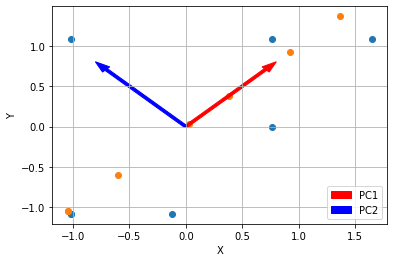

In [412]:
# Define data records
x = np.array([
    [ 0, -1],
    [ 1,  0],
    [ 2,  1],
    [ 1,  1],
    [-1,  1],
    [-1, -1],
    [-1, -1]
])

# Normalize data records
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Find principal components
cv = np.cov(x.T)
eVal, eVec = np.linalg.eigh(cv)
idx = eVal.argsort()[::-1]
pcx = eVec[:, idx]

# Find projections
y = x @ pcx[:, 0:1]

# Find real values
xp = y @ pcx[:, 0:1].T

# Plot records, prjections, pcx
plt.scatter(x.T[0], x.T[1])
plt.scatter(xp.T[0], xp.T[1])
plt.arrow(0, 0, *pcx[:,0], width=.03, label="PC1", color="red")
plt.arrow(0, 0, *pcx[:,1], width=.03, label="PC2", color="blue")
plt.grid(True, which='both')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

---

## Problem (2)

In this section, we will use the previously defined `Perceptron` model:

### Predict Function

First, we define the **Perceptron** predict function using **Step Function**:

In [413]:
def predict_function(weights, features):
    return np.heaviside(features @ weights, 1) * 2 - 1

### Accuracy Function

Next, we define the **Accuracy Function**:

In [414]:
def accuracy_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs < 0] = 0

    return np.sum(costs) / len(features)

### Gradient Function

Next, we define the **Gradient Function**:

$$
\begin{aligned}
    & \frac{\partial J(\Theta)}{\partial \Theta} = X Y
\end{aligned}
$$

In [415]:
def gradient_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs > 0] = 0
    costs[costs < 0] = 1

    return -(costs * features * labels)[0]

### Train Function

Now, we use the iterative stochastic gradient descent algorithm for computing the weights:

$$
\begin{aligned}
    & \Theta_{i} = \Theta_{i-1} - \alpha.\frac{\partial J(\Theta)}{\partial \Theta}
\end{aligned}
$$

In [416]:
def train_model(features, labels, learning_rate=0.001, epoch_count=1000, batch_size=1):
    data_set = np.append(features, np.array([labels]).T, 1)
    weights = np.ones(len(features[0]))
    history = np.zeros(epoch_count)

    for epoch in range(epoch_count):
        np.random.shuffle(data_set)

        batches = [
            data_set[batch * batch_size : (batch + 1) * batch_size]
            for batch in range(int(len(data_set) / batch_size))
        ]

        weights_temp = weights
        for batch in batches:
            gradient = gradient_function(weights_temp, batch[:, :-1], batch[:, -1])
            weights_temp = weights_temp - learning_rate * gradient

        accuracy_temp = accuracy_function(weights_temp, data_set[:, :-1], data_set[:, -1])
        accuracy = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])
        if (accuracy_temp > accuracy):
            weights = weights_temp

        history[epoch] = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])

    return (weights, history)

### Reduce Functions

This method, will use the `LDA` and `PCA` methods for finding the $LD1$ and $PC1$ components:

In [417]:
# Find the LD1 component
def find_ld1(features, labels):
    class_0 = np.array([
        features[i] for i in range(len(labels)) if labels[i] == -1
    ]).T
    class_1 = np.array([
        features[i] for i in range(len(labels)) if labels[i] == 1
    ]).T

    mean_0 = np.mean(class_0, axis=1).reshape(-1, 1)
    mean_1 = np.mean(class_1, axis=1).reshape(-1, 1)

    s1 = (class_0 - mean_0) @ (class_0 - mean_0).T
    s2 = (class_1 - mean_1) @ (class_1 - mean_1).T

    sw = s1 + s2
    sb = (mean_0 - mean_1) @ (mean_0 - mean_1).T

    values, matrix = np.linalg.eig(np.linalg.inv(sw) @ sb)

    return matrix[np.argmax(values)].reshape(-1, 1)

# Find the PC1 component
def find_pc1(features, labels):
    covariance_matrix = np.cov(features.T)
    eigenValues, eigenVectors = np.linalg.eigh(covariance_matrix)
    idx = eigenValues.argsort()[::-1]
    pcx = eigenVectors[:, idx]

    return pcx[:, 0:1]

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

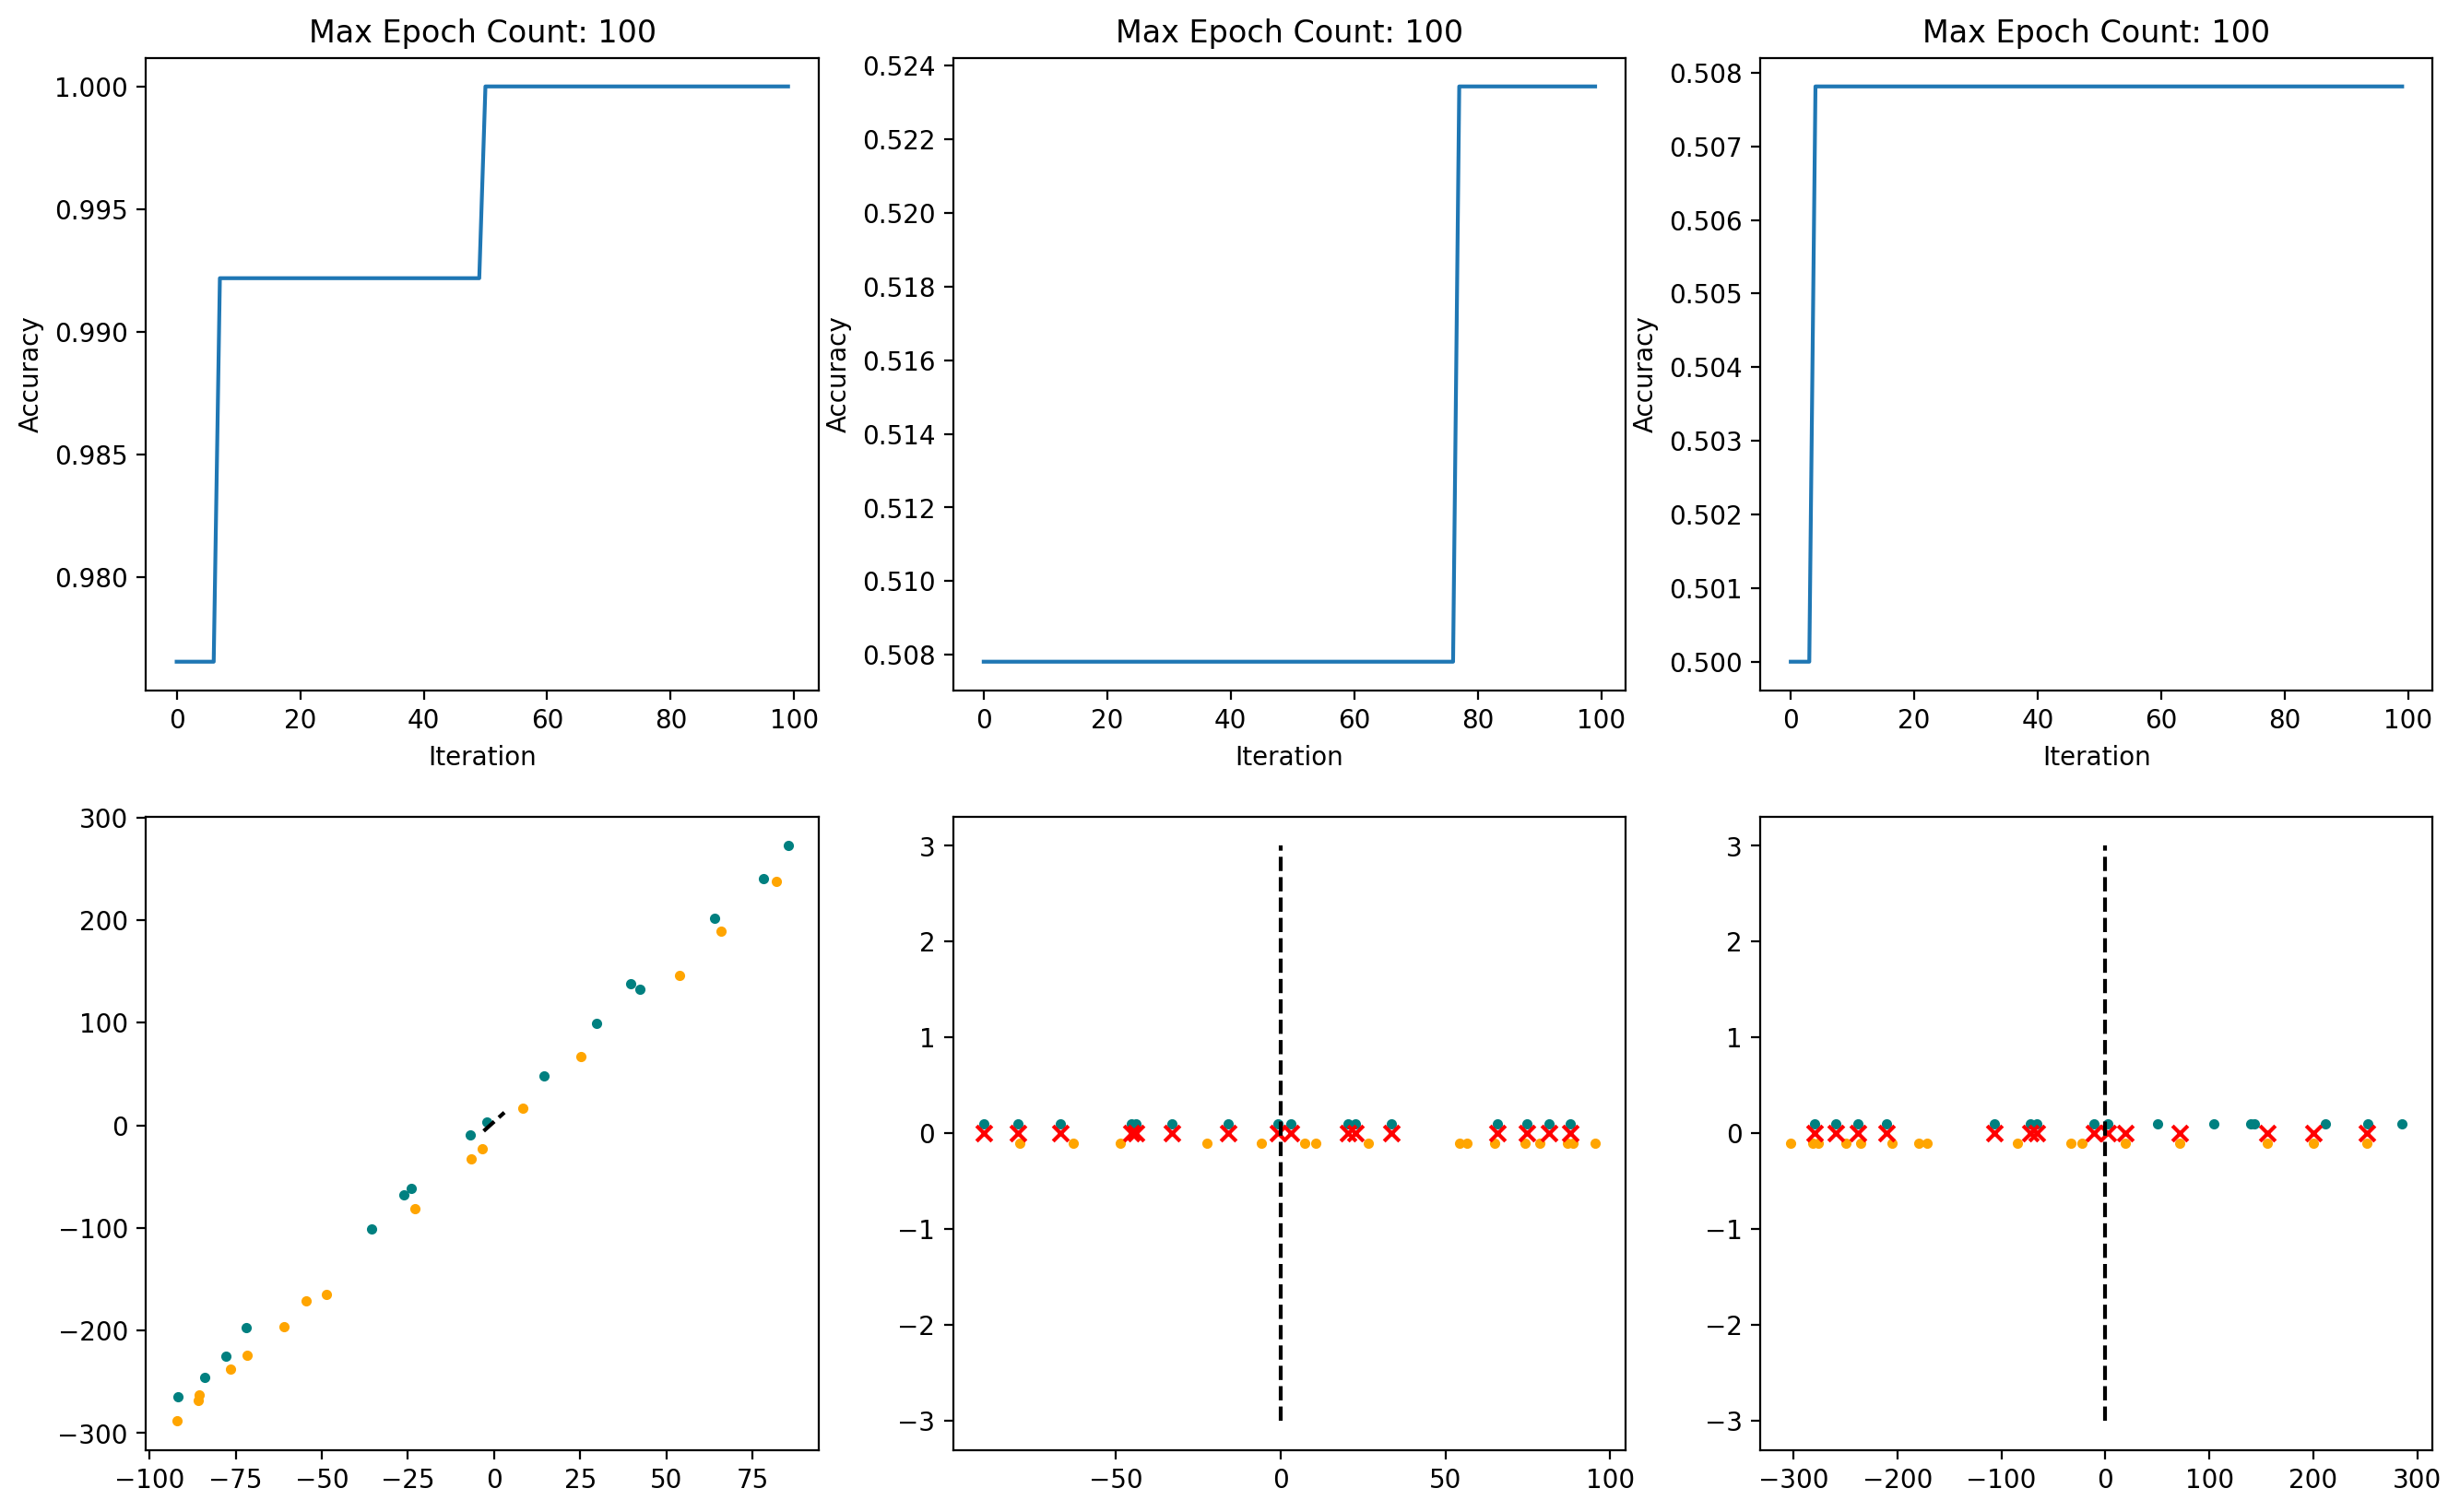

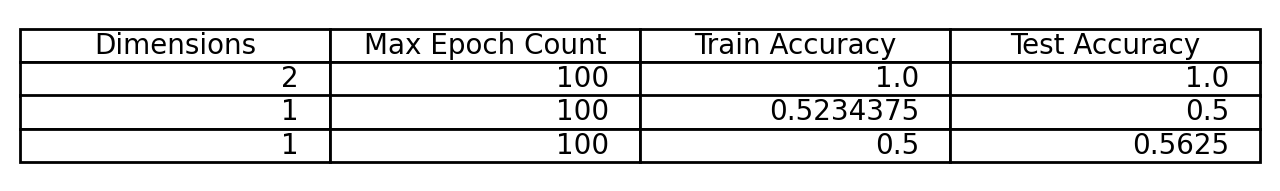

In [423]:
def plot(figure, index, dimensions, tests, weights, history):
    # Plot accuracy history
    axis = figure.add_subplot(2, 3, index)
    axis.plot(range(0, len(history)), history)
    axis.set_title(f"Max Epoch Count: {100}")
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Accuracy")

    # Plot test set and trained line
    test_predicts = predict_function(weights, features_matrix(tests, 1))
    test_class_0 = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] == -1
    ]).T
    test_class_1 = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] == 1
    ]).T
    test_class_incorrect = np.array([
        tests[i] for i in range(len(tests)) if test_labels[i] != test_predicts[i]
    ]).T

    # Plot data records and classifier line and incorrect classified records
    if (dimensions == 2):
        axis = fig.add_subplot(2, 3, 3 + index)
        axis.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
        axis.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
        if len(test_class_incorrect) > 0:
            axis.scatter(test_class_incorrect[0], test_class_incorrect[1], label="Class Incorrect", marker="x", c="red")
        x = np.linspace(-3, 3, 1000)
        f = lambda x: (-weights[1] * x - weights[0]) / weights[2]
        axis.plot(x, f(x), color='black', ls='--')
    else:
        axis = fig.add_subplot(2, 3, 3 + index)
        axis.scatter(test_class_0[0], np.zeros(len(test_class_0[0])) + 0.1, label="Class 0", marker=".", c="teal")
        axis.scatter(test_class_1[0], np.zeros(len(test_class_1[0])) - 0.1, label="Class 1", marker=".", c="orange")
        if len(test_class_incorrect) > 0:
            axis.scatter(test_class_incorrect[0], np.zeros(len(test_class_incorrect[0])), label="Class Incorrect", marker="x", c="red")
        y = np.linspace(-3, 3, 1000)
        x = np.zeros(len(y)) + weights[1]
        axis.plot(x, y, color='black', ls='--')

fig = plt.figure(figsize=(16, 10), dpi=200)

# Classify without reducing dimensions
(weights_vanila, history_vanila) = train_model(
    features_matrix(train_features, 1),
    train_labels,
    epoch_count=100
)
plot(fig, 1, 2, test_features, weights_vanila, history_vanila)

# Classify using LD1 component
ld1 = find_ld1(train_features, train_labels)
(weights_lda, history_lda) = train_model(
    features_matrix(train_features @ ld1, 1),
    train_labels,
    epoch_count=100
)
plot(fig, 2, 1, test_features @ ld1, weights_lda, history_lda)

# Classify using PC1 component
pc1 = find_pc1(train_features, train_labels)
(weights_pca, history_pca) = train_model(
    features_matrix(train_features @ pc1, 1),
    train_labels,
    epoch_count=100
)
plot(fig, 3, 1, test_features @ pc1, weights_pca, history_pca)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=[
    [
        "2", "100",
        accuracy_function(weights_vanila, features_matrix(train_features, 1), train_labels),
        accuracy_function(weights_vanila, features_matrix(test_features, 1), test_labels)
    ],
    [
        "1", "100",
        accuracy_function(weights_lda, features_matrix(train_features @ ld1, 1), train_labels),
        accuracy_function(weights_lda, features_matrix(test_features @ ld1, 1), test_labels)
    ],
    [
        "1", "100",
        accuracy_function(weights_pca, features_matrix(train_features @ ld1, 1), train_labels),
        accuracy_function(weights_pca, features_matrix(test_features @ pc1, 1), test_labels)
    ],
], colLabels=["Dimensions", "Max Epoch Count", "Train Accuracy", "Test Accuracy"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the model accuracy with 100 iterations without any dimensionality reduction is about `0.93`, but when we reduce dimensions using $LD1$ component, the accuracy reduced to `0.90`

---

## Problem (3)

First we will find the **Principal Components** using **Covariance Matrix**:

In [ ]:
covariance_matrix = np.cov(train_faces.T)
eigenValues, eigenVectors = np.linalg.eigh(covariance_matrix)
idx = eigenValues.argsort()[::-1]
pcx = eigenVectors[:, idx]

### (1)

Now we will find the projection of data records using $PC_1$ through $PC_{45}$:

In [ ]:
projected_faces = test_faces @ pcx[:, 0:45]
real_faces = projected_faces @ pcx[:, 0:45].T

rmse = np.linalg.norm(real_faces - test_faces) / np.sqrt(len(test_faces))
print(f"RMSE using 45 components: {rmse}")

fig = plt.figure(figsize=(16, 8))
for i in range(8):
    for j in range(4):
        ax = fig.add_subplot(4, 8, (i * 4) + j + 1)
        ax.imshow((test_faces[i * 8 + j] + faces_mean).reshape(64,64).T, cmap="gray")
        ax.axis("off")
plt.show()


fig = plt.figure(figsize=(16, 8))
for i in range(8):
    for j in range(4):
        ax = fig.add_subplot(4, 8, (i * 4) + j + 1)
        ax.imshow((real_faces[i * 8 + j] + faces_mean).reshape(64,64).T, cmap="gray")
        ax.axis("off")
plt.show()

### (2)

Now we will find the best number of principal components, needed for a good fit:

In [ ]:
def find_best_number_of_components():
    for i in range(1, 400):
        projected_faces = train_faces @ pcx[:, 0:i*10]
        real_faces = projected_faces @ pcx[:, 0:i*10].T
        rmse = np.linalg.norm(real_faces - train_faces) / np.sqrt(len(train_faces))
        if rmse < 1:
            return i*10
    return 4000

best = find_best_number_of_components()
projected_faces = test_faces @ pcx[:, 0:best]
real_faces = projected_faces @ pcx[:, 0:best].T
rmse = np.linalg.norm(real_faces - test_faces) / np.sqrt(len(test_faces))
print(f"RMSE using {best} components: {rmse}")

fig = plt.figure(figsize=(16, 8))
for i in range(8):
    for j in range(4):
        ax = fig.add_subplot(4, 8, (i * 4) + j + 1)
        ax.imshow((test_faces[i * 8 + j] + faces_mean).reshape(64,64).T, cmap="gray")
        ax.axis("off")
plt.show()


fig = plt.figure(figsize=(16, 8))
for i in range(8):
    for j in range(4):
        ax = fig.add_subplot(4, 8, (i * 4) + j + 1)
        ax.imshow((real_faces[i * 8 + j] + faces_mean).reshape(64,64).T, cmap="gray")
        ax.axis("off")
plt.show()

### Results

As we can see, the `first best` number of components is `280` with `RMSE` for `train set` less than `1`.

---

### Results

As we can see, **LD1** vector is equals to the `Eigen Vector` related to `Maximum Eigen Value` which is $\begin{bmatrix}1 \\ -0.55\end{bmatrix}$.

---

## Problem (4)

### Results

As we can see, **LD1** vector is equals to the `Eigen Vector` related to `Maximum Eigen Value` which is $\begin{bmatrix}1 \\ -0.55\end{bmatrix}$.

---